In [111]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [112]:
df = pd.read_pickle("../datos/setas/setas_balance.pkl")

In [113]:
df.head()

,cap-diameter_e,stem-height_e,stem-width_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,does-bruise-or-bleed_f,does-bruise-or-bleed_t,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,has-ring_f,has-ring_t,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w,class
0,0.539822,1.896624,2.070907,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,0.990399,0.478773,1.573231,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1.598225,1.942808,0.930802,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,-0.669783,0.746640,-0.886196,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.645662,1.093021,1.308539,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [114]:
df.isnull().sum()

cap-diameter_e            0
stem-height_e             0
stem-width_e              0
cap-shape_b               0
cap-shape_c               0
cap-shape_f               0
cap-shape_o               0
cap-shape_p               0
cap-shape_s               0
cap-shape_x               0
cap-surface_d             0
cap-surface_e             0
cap-surface_g             0
cap-surface_h             0
cap-surface_i             0
cap-surface_k             0
cap-surface_l             0
cap-surface_s             0
cap-surface_t             0
cap-surface_w             0
cap-surface_y             0
cap-color_b               0
cap-color_e               0
cap-color_g               0
cap-color_k               0
cap-color_l               0
cap-color_n               0
cap-color_o               0
cap-color_p               0
cap-color_r               0
cap-color_u               0
cap-color_w               0
cap-color_y               0
does-bruise-or-bleed_f    0
does-bruise-or-bleed_t    0
gill-attachment_a   

In [115]:
# separamos los datos en X e y

X1 = df.drop("class", axis = 1)
y1 = df["class"]

In [116]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [117]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

In [118]:
"""

fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

"""

'\n\nfig = plt.figure(figsize = (10,6))\ntree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)\nplt.show()\n\n'

In [119]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 9. 

max_features = np.sqrt(len(x_train1.columns))
max_features

9.433981132056603

In [120]:
# max depth

print(arbol.tree_.max_depth)

26


In [121]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [122]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kappa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [123]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.994699,0.994144,0.99531,0.994726,0.989398,test,Decission Tree Esta I
1,1.000000,1.000000,1.00000,1.000000,1.000000,train,Decission Tree Esta I


In [124]:
# definimos los hiperparámetros

param = {"max_depth": [16, 18, 20, 22, 24, 26, 28], 
        "max_features": [4,5,6,7,8,9],
        "min_samples_split": [50, 100, 200],
        "min_samples_leaf": [50,100, 200]} 

In [125]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [126]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [16, 18, 20, 22, 24, 26, 28],
                         'max_features': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [50, 100, 200],
                         'min_samples_split': [50, 100, 200]},
             verbose=-1)

In [127]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=28, max_features=8, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

Nuestro mejor modelo:

- max_depth = 28
- max_features = 8
- min_samples_leaf = 50
- min_samples_split = 50


In [128]:
"""

# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

"""

'\n\n# veamos ahora que pinta tiene nuestro árbol\n\nfig = plt.figure(figsize=(40, 20))\ntree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);\n\n'

In [129]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [130]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.906938,0.914756,0.898452,0.906531,0.813888,test,Decision tree Esta II
1,0.908609,0.915238,0.900395,0.907756,0.817214,train,Decision tree Esta II


In [131]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.994699,0.994144,0.995310,0.994726,0.989398,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.906938,0.914756,0.898452,0.906531,0.813888,test,Decision tree Esta II
1,0.908609,0.915238,0.900395,0.907756,0.817214,train,Decision tree Esta II


In [132]:
# vamos a cargar los csv de las métricas de nuestros otros modelos para comparar todos los modelos que hemos hecho, y comparar cuál de ellos es el mejor

df_logistic_results = pd.read_csv("../datos/setas/metricas_RLogistica.csv", index_col = 0)
df_logistic_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.782486,0.767488,0.812794,0.789492,0.564871,test,Regresión logistica
1,0.780696,0.765383,0.808967,0.786572,0.561414,train,Regresión logistica


In [133]:
# concatenamos todos los resultados

df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.782486,0.767488,0.812794,0.789492,0.564871,test,Regresión logistica
1,0.780696,0.765383,0.808967,0.786572,0.561414,train,Regresión logistica
2,0.994699,0.994144,0.995310,0.994726,0.989398,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.906938,0.914756,0.898452,0.906531,0.813888,test,Decision tree Esta II
5,0.908609,0.915238,0.900395,0.907756,0.817214,train,Decision tree Esta II


In [134]:
df_DT_LR_results.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.782486,0.767488,0.812794,0.789492,0.564871,test,Regresión logistica
1,0.780696,0.765383,0.808967,0.786572,0.561414,train,Regresión logistica
2,0.994699,0.994144,0.995310,0.994726,0.989398,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.906938,0.914756,0.898452,0.906531,0.813888,test,Decision tree Esta II
5,0.908609,0.915238,0.900395,0.907756,0.817214,train,Decision tree Esta II


Hasta ahora, podemos observar que el segundo Decision tree que hicimos, utilizando GridSearch, nos ha dado el mejor ajuste hasta ahora. Hemos logrado aumentar todas las métricas, incluso el kappa que nos tenía preocupadas, ya que nuestro modelo de Regresión Logística estaba realizando predicciones algo azarosas. 

In [135]:
# ademas vamos a guardar este dataframe en un csv

df_DT_LR_results.to_csv("../datos/setas/metricas_modelos.csv")

In [162]:
# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,stem-width_e,1.013886e-01
1,stem-height_e,9.529109e-02
0,cap-diameter_e,5.452821e-02
9,cap-shape_x,3.971976e-02
26,cap-color_n,3.640095e-02
60,stem-color_n,3.460087e-02
77,habitat_d,3.381326e-02
65,stem-color_w,3.244282e-02
76,ring-type_z,3.040350e-02
14,cap-surface_i,2.991372e-02


In [188]:
df_predictores = importancia_predictores.reset_index(drop=True)

In [189]:
df_predictores


,predictor,importancia
0,stem-width_e,1.013886e-01
1,stem-height_e,9.529109e-02
2,cap-diameter_e,5.452821e-02
3,cap-shape_x,3.971976e-02
4,cap-color_n,3.640095e-02
5,stem-color_n,3.460087e-02
6,habitat_d,3.381326e-02
7,stem-color_w,3.244282e-02
8,ring-type_z,3.040350e-02
9,cap-surface_i,2.991372e-02


In [190]:
df_cols = pd.read_pickle('../datos/setas/setas_limpio.pkl')
df_cols.head(2)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
353,p,6.87,x,g,n,f,e,w,6.88,13.64,w,t,p,d,a
354,p,8.59,p,g,n,f,e,w,9.15,17.34,w,t,p,d,a


In [191]:
columnas = df_cols.drop('class', axis=1).columns

In [192]:
index_var = {}
for c in columnas:

    index_var[c] = df_predictores[df_predictores["predictor"].str.contains(c, regex=True)].index.to_list()

index_var

{'cap-diameter': [2],
 'cap-shape': [3, 24, 35, 57, 70, 80, 86],
 'cap-surface': [9, 23, 28, 31, 36, 42, 43, 51, 59, 60, 66],
 'cap-color': [4, 19, 27, 33, 37, 38, 52, 55, 68, 78, 82, 84],
 'does-bruise-or-bleed': [13, 25],
 'gill-attachment': [10, 11, 12, 17, 21, 39, 58],
 'gill-color': [14, 15, 16, 30, 32, 46, 47, 50, 62, 64, 74, 77],
 'stem-height': [1],
 'stem-width': [0],
 'stem-color': [5, 7, 20, 29, 40, 41, 48, 54, 56, 75, 83, 85, 87],
 'has-ring': [18, 81],
 'ring-type': [8, 49, 53, 61, 65, 76, 79, 88],
 'habitat': [6, 22, 45, 63, 69, 71, 72, 73],
 'season': [26, 34, 44, 67]}

In [193]:
stem_color= df_predictores.iloc[index_var['stem-color']]
stem_color

,predictor,importancia
5,stem-color_n,0.034601
7,stem-color_w,0.032443
20,stem-color_y,0.016495
29,stem-color_e,0.011111
40,stem-color_r,0.007195
41,stem-color_u,0.006974
48,stem-color_g,0.004563
54,stem-color_k,0.002101
56,stem-color_p,0.001610
75,stem-color_f,0.000000


In [194]:
cap_surface = df_predictores.loc[index_var['cap-surface']]
cap_surface

,predictor,importancia
9,cap-surface_i,0.029914
23,cap-surface_t,0.014584
28,cap-surface_e,0.011892
31,cap-surface_k,0.010295
36,cap-surface_s,0.008998
42,cap-surface_y,0.006526
43,cap-surface_h,0.006411
51,cap-surface_d,0.003224
59,cap-surface_g,0.000710
60,cap-surface_w,0.000479


In [195]:
gill_attachment = df_predictores.loc[index_var['gill-attachment']]
gill_attachment

,predictor,importancia
10,gill-attachment_x,0.028754
11,gill-attachment_e,0.021847
12,gill-attachment_p,0.021365
17,gill-attachment_a,0.017609
21,gill-attachment_d,0.016493
39,gill-attachment_s,0.008165
58,gill-attachment_f,0.000819


In [196]:
cap_shape = df_predictores.loc[index_var['cap-shape']]
cap_shape

,predictor,importancia
3,cap-shape_x,0.039720
24,cap-shape_s,0.013440
35,cap-shape_b,0.009072
57,cap-shape_f,0.001133
70,cap-shape_c,0.000000
80,cap-shape_p,0.000000
86,cap-shape_o,0.000000


In [197]:
gill_color = df_predictores.loc[index_var['gill-color']]
gill_color

,predictor,importancia
14,gill-color_p,0.019171
15,gill-color_f,0.018548
16,gill-color_y,0.017900
30,gill-color_g,0.010323
32,gill-color_w,0.009897
46,gill-color_e,0.005354
47,gill-color_n,0.005344
50,gill-color_k,0.003658
62,gill-color_r,0.000283
64,gill-color_u,0.000017


In [198]:
does_bruise_or_bleed= df_predictores.loc[index_var['does-bruise-or-bleed']]
does_bruise_or_bleed

,predictor,importancia
13,does-bruise-or-bleed_f,0.020657
25,does-bruise-or-bleed_t,0.013383


In [199]:
ring_type= df_predictores.loc[index_var['ring-type']]
ring_type

,predictor,importancia
8,ring-type_z,0.030404
49,ring-type_f,0.003852
53,ring-type_p,0.002408
61,ring-type_l,0.000416
65,ring-type_e,0.000008
76,ring-type_r,0.000000
79,ring-type_g,0.000000
88,ring-type_m,0.000000


In [200]:
cap_color= df_predictores.loc[index_var['cap-color']]
cap_color

,predictor,importancia
4,cap-color_n,3.640095e-02
19,cap-color_y,1.696294e-02
27,cap-color_e,1.277006e-02
33,cap-color_l,9.494181e-03
37,cap-color_p,8.706632e-03
38,cap-color_g,8.595673e-03
52,cap-color_r,2.893753e-03
55,cap-color_b,1.722980e-03
68,cap-color_u,1.828572e-07
78,cap-color_k,0.000000e+00


In [201]:
habitat= df_predictores.loc[index_var['habitat']]
habitat

,predictor,importancia
6,habitat_d,0.033813
22,habitat_g,0.016057
45,habitat_p,0.005587
63,habitat_l,0.000019
69,habitat_m,0.000000
71,habitat_u,0.000000
72,habitat_w,0.000000
73,habitat_h,0.000000


In [202]:
season= df_predictores.loc[index_var['season']]
season

,predictor,importancia
26,season_u,1.333553e-02
34,season_w,9.155818e-03
44,season_a,5.757628e-03
67,season_s,4.956193e-07


In [203]:
has_ring = df_predictores.loc[index_var['has-ring']]
has_ring

,predictor,importancia
18,has-ring_t,0.017349
81,has-ring_f,0.000000


In [204]:
# eliminamos esas filas del dataframe donde tenemos los valores de importancia

df_predictores.drop(stem_color.index, inplace = True)
df_predictores.drop(cap_surface.index, inplace = True)
df_predictores.drop(gill_attachment.index, inplace = True)
df_predictores.drop(cap_shape.index, inplace = True)
df_predictores.drop(gill_color.index, inplace = True)
df_predictores.drop(does_bruise_or_bleed.index, inplace = True)
df_predictores.drop(ring_type.index, inplace = True)
df_predictores.drop(cap_color.index, inplace = True)
df_predictores.drop(habitat.index, inplace = True)
df_predictores.drop(season.index, inplace = True)
df_predictores.drop(has_ring.index, inplace=True)



In [205]:
df_predictores

,predictor,importancia
0,stem-width_e,0.101389
1,stem-height_e,0.095291
2,cap-diameter_e,0.054528


In [206]:
# nos creamos nuevas filas con el resultado de la suma

df_predictores.loc[3] =  ["stem_color", stem_color["importancia"].sum()]
df_predictores.loc[4] =  ["cap_surface", cap_surface["importancia"].sum()]
df_predictores.loc[5] =  ["gill_attachment", gill_attachment["importancia"].sum()]
df_predictores.loc[6] =  ["cap_shape", cap_shape["importancia"].sum()]

df_predictores.loc[7] =  ["gill_color", gill_color["importancia"].sum()]
df_predictores.loc[8] =  ["does_bruise_or_bleed", does_bruise_or_bleed["importancia"].sum()]
df_predictores.loc[9] =  ["ring_type", ring_type["importancia"].sum()]
df_predictores.loc[10] =  ["cap_color", cap_color["importancia"].sum()]

df_predictores.loc[11] =  ["habitat", habitat["importancia"].sum()]
df_predictores.loc[12] =  ["season", season["importancia"].sum()]
df_predictores.loc[13] = ['has-ring', has_ring['importancia'].sum()]


# ordenamos el df

df_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
df_predictores

,predictor,importancia
3,stem_color,0.117094
5,gill_attachment,0.115051
0,stem-width_e,0.101389
10,cap_color,0.097547
1,stem-height_e,0.095291
4,cap_surface,0.093038
7,gill_color,0.090495
6,cap_shape,0.063364
11,habitat,0.055476
2,cap-diameter_e,0.054528


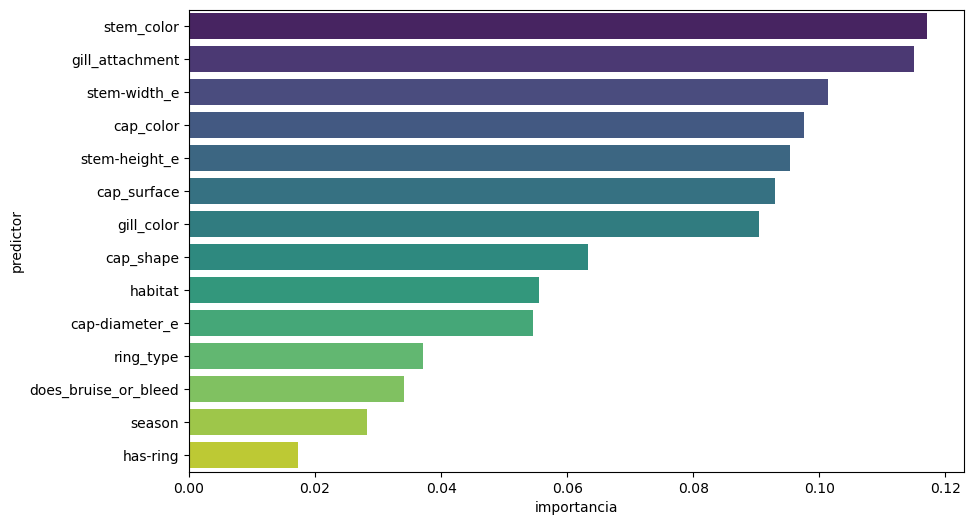

In [207]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = df_predictores, palette="viridis");
plt.show()

- En este último gráfico podemos ver la diferencia en importancia de cada una de nuestras variables a la hora de predecir si una seta será venenosa o no. Observamos que el color del tallo y la adherencia de las branquias son las variables más importante (sobre 'gill-attachment' habíamos visto en el EDA las diferencias que existían entre las setas que tenían branquias adnatas y no en nuestras setas venenosas y comestibles). 
- Algunas variables como 'has-ring' o 'season' no parecerían tener un rol muy importante, en futuros modelos podrían omitirse. 

## Random Forest


In [208]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 
param = {"max_depth": [16, 18, 20, 22, 24, 26, 28], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [4,5,6,7,8,9],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [50, 100, 200],
        "min_samples_leaf": [50,100, 200]} 

In [ ]:
gs_rf = GridSearchCV(
estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
param_grid= param, # que hiperparámetros queremos que testee
cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
verbose=-1) # para que no nos printee ningún mensaje en pantalla 

In [ ]:
# separamos los datos en X e y

X = df.drop("class", axis = 1)
y = df["class"]

In [ ]:
# separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# ajustamos el modelo que acabamos de definir en el GridSearch
# 🚨 Esta celda puede tardar en ejecutarse

gs_rf.fit(x_train, y_train) 

KeyboardInterrupt: 

In [ ]:
# saquemos ahora cual es nuestro mejor bosque

bosque = gs_rf.best_estimator_
bosque 

RandomForestClassifier(max_depth=28, max_features=9, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [ ]:
# dibujemos los árboles de nuestro bosque
"""
for arbol in tqdm(bosque.estimators_):
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
plt.show()

""" 

In [ ]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [ ]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results = metricas(y_test, y_pred_test_rf,y_train, y_pred_train_rf, "Random Forest")
dt_results 

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.990912,0.991455,0.990280,0.990867,0.981824,test,Random Forest
1,0.991266,0.992204,0.990332,0.991267,0.982531,train,Random Forest


In [ ]:
# igual que en la clase de decision tree, juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
# lo primero que tenemos que hacer es cargar el csv con todos los resultados que guardamos en el jupyter anterior

df_metricas = pd.read_csv("../datos/setas/metricas_modelos.csv", index_col=0)
df_metricas

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.782486,0.767488,0.812794,0.789492,0.564871,test,Regresión logistica
1,0.780696,0.765383,0.808967,0.786572,0.561414,train,Regresión logistica
2,0.994217,0.993426,0.995061,0.994243,0.988434,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.897321,0.875277,0.927563,0.900662,0.794594,test,Decision tree Esta II
5,0.903066,0.880480,0.932542,0.905763,0.806142,train,Decision tree Esta II


In [ ]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados = pd.concat([dt_results, df_metricas], axis = 0)
df_todos_resultados 

,accuracy,precision,recall,f1,kappa,set,modelo
0,0.990912,0.991455,0.990280,0.990867,0.981824,test,Random Forest
1,0.991266,0.992204,0.990332,0.991267,0.982531,train,Random Forest
0,0.782486,0.767488,0.812794,0.789492,0.564871,test,Regresión logistica
1,0.780696,0.765383,0.808967,0.786572,0.561414,train,Regresión logistica
2,0.994217,0.993426,0.995061,0.994243,0.988434,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.897321,0.875277,0.927563,0.900662,0.794594,test,Decision tree Esta II
5,0.903066,0.880480,0.932542,0.905763,0.806142,train,Decision tree Esta II


Este último dataframe nos muestra que el Random Forest es el mejor de todos los modelos que hemos generado hasta ahora. Todas nuestras métricas han aumentado hasta alrededor del 99%. 

In [ ]:
df_todos_resultados.style.background_gradient(cmap='seismic') 

Lamentablemente, por falta de potencia del ordenador, la siguiente parte no se ha podido correr ya que se realizó porteriormente y se tendría que volver a correr el RandomForest. De todas maneras, esperamos que la importancia de nuestras predictoras sea similar a las de nuestro segundo Decision Tree. 

In [ ]:
importancia_predictores = pd.DataFrame(
{'predictor': x_train.columns,
'importancia': bosque.feature_importances_}
)


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores 

In [ ]:
df_predictores = importancia_predictores.reset_index(drop=True)

In [ ]:
df_predictores


In [ ]:
index_var = {}
for c in columnas:

    index_var[c] = df_predictores[df_predictores["predictor"].str.contains(c, regex=True)].index.to_list()

index_var

In [ ]:
stem_color= df_predictores.iloc[index_var['stem-color']]
stem_color

In [ ]:
cap_surface = df_predictores.loc[index_var['cap-surface']]
cap_surface

In [ ]:
gill_attachment = df_predictores.loc[index_var['gill-attachment']]
gill_attachment

In [ ]:
cap_shape = df_predictores.loc[index_var['cap-shape']]
cap_shape

In [ ]:
gill_color = df_predictores.loc[index_var['gill-color']]
gill_color

In [ ]:
does_bruise_or_bleed= df_predictores.loc[index_var['does-bruise-or-bleed']]
does_bruise_or_bleed

In [ ]:
ring_type= df_predictores.loc[index_var['ring-type']]
ring_type

In [ ]:
cap_color= df_predictores.loc[index_var['cap-color']]
cap_color

In [ ]:
habitat= df_predictores.loc[index_var['habitat']]
habitat

In [ ]:
season= df_predictores.loc[index_var['season']]
season

In [ ]:
has_ring = df_predictores.loc[index_var['has-ring']]
has_ring

In [ ]:

df_predictores.drop(stem_color.index, inplace = True)
df_predictores.drop(cap_surface.index, inplace = True)
df_predictores.drop(gill_attachment.index, inplace = True)
df_predictores.drop(cap_shape.index, inplace = True)
df_predictores.drop(gill_color.index, inplace = True)
df_predictores.drop(does_bruise_or_bleed.index, inplace = True)
df_predictores.drop(ring_type.index, inplace = True)
df_predictores.drop(cap_color.index, inplace = True)
df_predictores.drop(habitat.index, inplace = True)
df_predictores.drop(season.index, inplace = True)
df_predictores.drop(has_ring.index, inplace=True)


In [ ]:
df_predictores.loc[3] =  ["stem_color", stem_color["importancia"].sum()]
df_predictores.loc[4] =  ["cap_surface", cap_surface["importancia"].sum()]
df_predictores.loc[5] =  ["gill_attachment", gill_attachment["importancia"].sum()]
df_predictores.loc[6] =  ["cap_shape", cap_shape["importancia"].sum()]

df_predictores.loc[7] =  ["gill_color", gill_color["importancia"].sum()]
df_predictores.loc[8] =  ["does_bruise_or_bleed", does_bruise_or_bleed["importancia"].sum()]
df_predictores.loc[9] =  ["ring_type", ring_type["importancia"].sum()]
df_predictores.loc[10] =  ["cap_color", cap_color["importancia"].sum()]

df_predictores.loc[11] =  ["habitat", habitat["importancia"].sum()]
df_predictores.loc[12] =  ["season", season["importancia"].sum()]
df_predictores.loc[13] = ['has-ring', has_ring['importancia'].sum()]


# ordenamos el df

df_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
df_predictores

In [ ]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = df_predictores, palette="viridis");
plt.show()